# Desafio (Parte 1) - Distribuição de Produtos por Usuário

## Case baseado no desafio do Kaggle: "Instacart Market Basket Analysis"

Esse desafio é baseado em uma competição do Kaggle ([https://www.kaggle.com](https://www.kaggle.com)) de 2017, onde é pedido para fazer a predição de se um produto será comprado por dado usuário no carrinho atual, baseado em suas compras anteriores.

Não está no escopo da aula 



Link para o desafio: [https://www.kaggle.com/c/instacart-market-basket-analysis](https://www.kaggle.com/c/instacart-market-basket-analysis)

## Origem dos Dados:

Os dados mostrados nesse desafio são uma amostra extraída do dataset disponibilizado gratuitamente pela empresa Instacart ([https://www.instacart.com/](https://www.instacart.com/)) **\***. São dados reais do banco de dados da empresa, que foram anonimizados para o uso por pesquisadores e em competições de Data Science.

 
###### * “The Instacart Online Grocery Shopping Dataset 2017”, Accessed from [https://www.instacart.com/datasets/grocery-shopping-2017](https://www.instacart.com/datasets/grocery-shopping-2017) on March 10, 2017.

___

# Imports

In [77]:
import numpy as np
import os
import pandas as pd

In [78]:
""" habilitando plots no notebook """
%matplotlib inline

In [79]:
""" plot libs """
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
""" Configurando o Matplotlib para o modo manual """
plt.interactive(False)

# Objetivo :

Analisar o dataset (o mesmo construído na Aula 07) e responder às questões em cada item usando gráficos.

# Importante:

Todos os gráficos devem conter:
* Título
* Rótulos do Eixo X e do Eixo Y

Se mais de um gráfico for plotado em uma única janela, eles devem ter:
* Cores diferentes
* Legenda
* Transparência (na sobreposição)

# Dataset:

O dataset utilizado nesse desafio é um sub-conjunto daquele construído na Aula 7. Para essa aula, será necessário carregar apenas duas colunas: `user_id` e `product_name`.

## Carregando os dados

In [81]:
""" Nota sobre o Warning: 
    O código abaixo levanta um Warning gerado por uma chamada interna do pandas conflitando com o Numpy.
    Não há necessidade de tratar esse Warning no momento, o comportamento do 'read_csv' é funcional para o que queremos.
"""
dataset = pd.read_csv(
    os.path.join("data", "dataset.csv"),
    usecols=["user_id", "product_name"],
    sep=",",
    index_col=0,
    encoding="utf-8"
)

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [82]:
dataset.head()

,product_name
user_id,
1,Soda
1,Organic String Cheese
1,0% Greek Strained Yogurt
1,XL Pick-A-Size Paper Towel Rolls
1,Milk Chocolate Almonds


## Extração dos dados específicos

In [83]:
product_count = dataset.groupby("user_id").product_name.count()

In [84]:
product_count.describe()

count    114885.000000
mean         10.568394
std           7.946615
min           1.000000
25%           5.000000
50%           9.000000
75%          14.000000
max          80.000000
Name: product_name, dtype: float64

In [85]:
product_count.head(10)

user_id
1     11
2     31
5      9
7      9
8     18
9     22
10     4
13     5
14    11
17     6
Name: product_name, dtype: int64

# Problemas

## A) Visualização da Distribuição Original

Avalie a distribuição de dados do `Número de Produtos` por `Usuário`, respondendo a cada item. 

### A.1) Visualização

Construa uma visualização composta que mostre a distribuição de dados e os outliers.

Depois, responda às perguntas:
* Qual o tipo dessa distribuição? 
* Existem Outliers? Descreva-os.

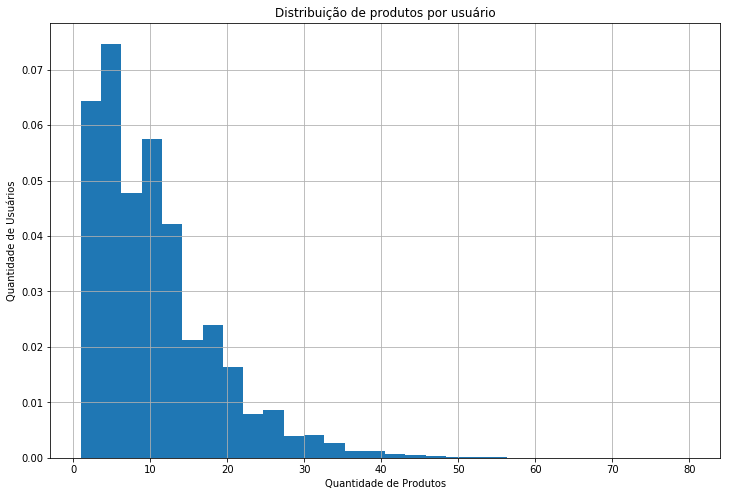

In [91]:
""" Escreva a a Solução Aqui """    
ax = product_count.hist(bins=30, normed=True, figsize=(12,8))
ax.set_xlabel('Quantidade de Produtos')
ax.set_ylabel('Quantidade de Usuários')
ax.set_title('Distribuição de produtos por usuário')
plt.show()

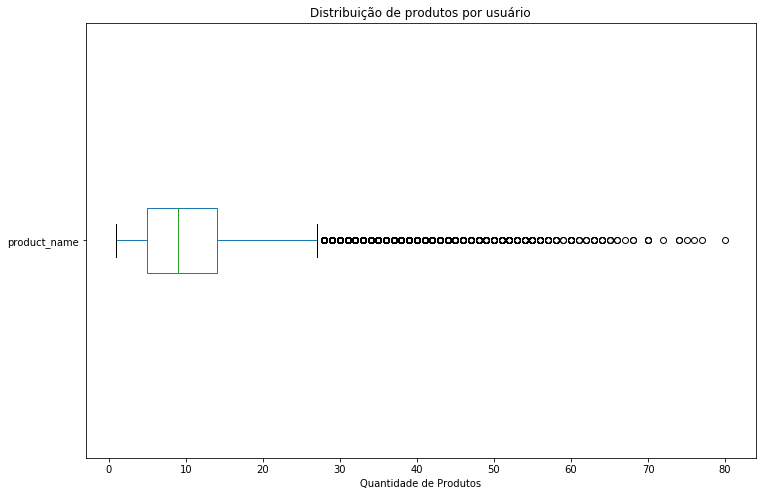

In [92]:
ax = product_count.plot(kind='box', vert=False, figsize=(12,8))
ax.set_xlabel('Quantidade de Produtos')
# ax.set_ylabel('Quantidade de Usuários')
ax.set_title('Distribuição de produtos por usuário')
plt.show()

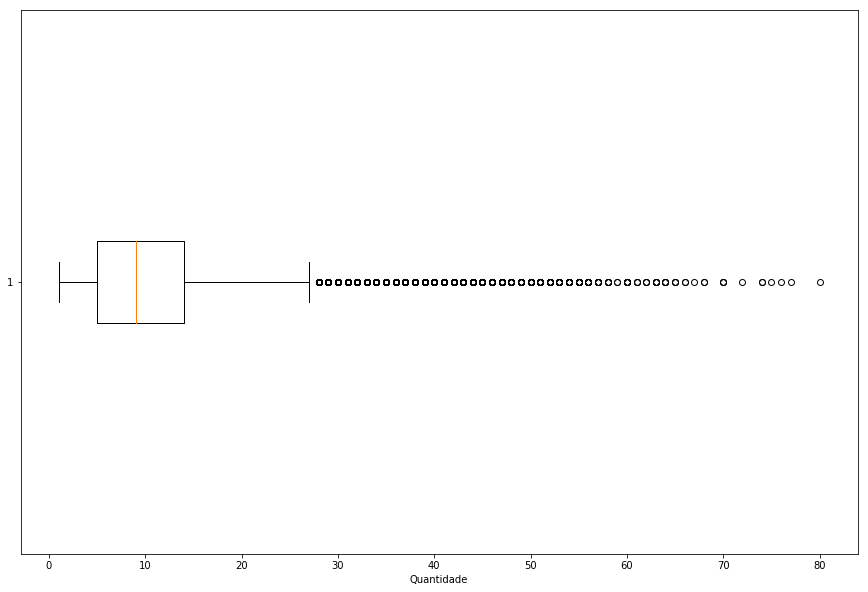

In [93]:
plt.figure(figsize=(15,10))
plt.boxplot(product_count, vert=False)
plt.xlabel('Quantidade')
plt.show()

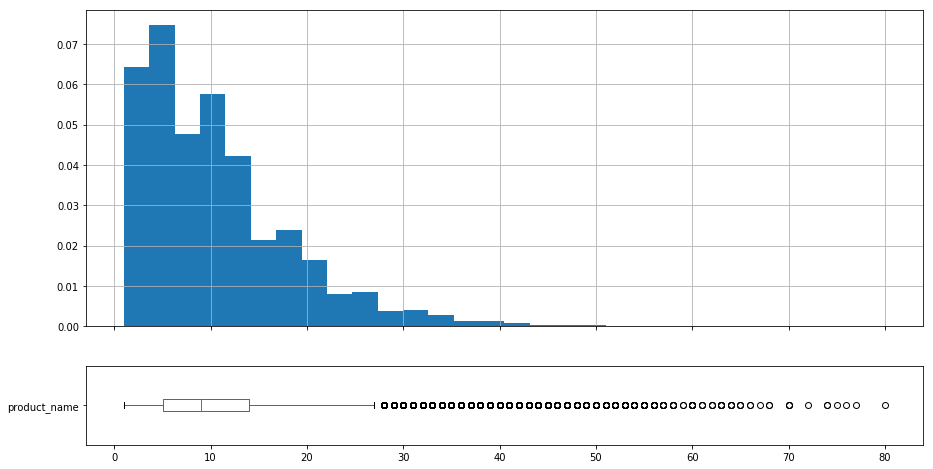

In [94]:
fig = plt.figure(figsize=(12,8))
f, axes = plt.subplots(2,1, figsize=(15,8), sharex=True, gridspec_kw={'height_ratios':[4,1]})

product_count.hist(bins=30, normed=True, ax=axes[0])
product_count.plot(kind='box', vert=False, figsize=(15,8), ax=axes[1])

    

# ax.set_xlabel('Quantidade de Produtos')
# ax.set_ylabel('Quantidade de Usuários')
# ax.set_title('Distribuição de produtos por usuário')
plt.show()

### A.2) Cortes

Proponha cortes de usuários de forma que não se percam muitos dados e que a distribuição seja mantida. 

Adicione os cortes à visualização usando `segmentos pontilhados de reta` e `textos com os valores dos cortes`.

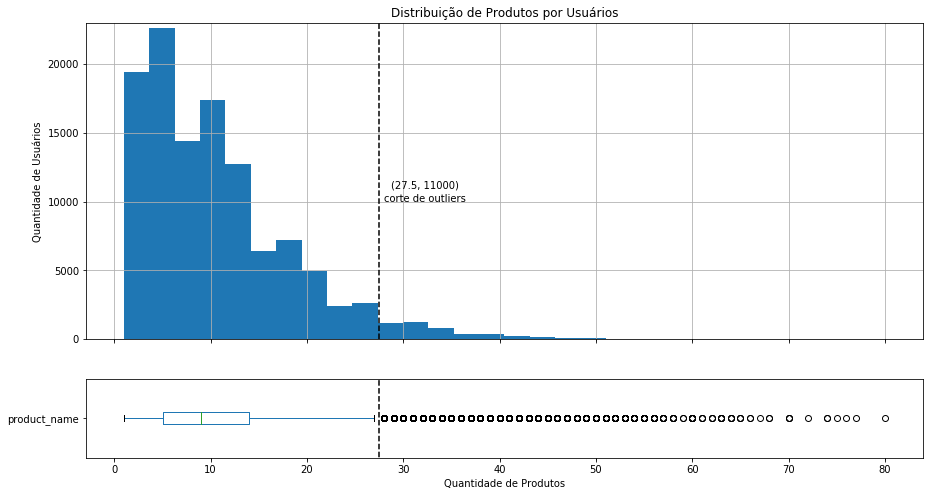

In [111]:
""" Escreva a a Solução Aqui """
_, axes = plt.subplots(
    2, 1, 
    figsize=(15, 8), 
    sharex=True,     
    gridspec_kw={"height_ratios": [4, 1]}
)

product_count.hist(bins=30, normed=False, ax=axes[0])
product_count.plot(kind="box", vert=False, ax=axes[1])

axes[0].text(28.7, 11000, s="(27.5, 11000)")
axes[0].text(28, 10000, s="corte de outliers")
axes[0].set_ylim(0, 23000)
axes[0].set_ylabel("Quantidade de Usuários")
axes[0].set_title("Distribuição de Produtos por Usuários")
axes[0].plot([27.5, 27.5], [0, 23000], "k--")

axes[1].set_xlabel("Quantidade de Produtos")
axes[1].plot([27.5, 27.5], [0, 23000], "k--")

plt.show()

### A.3) Nova Distribuição

Elimine os outliers e construa outro plot da nova distribuição.

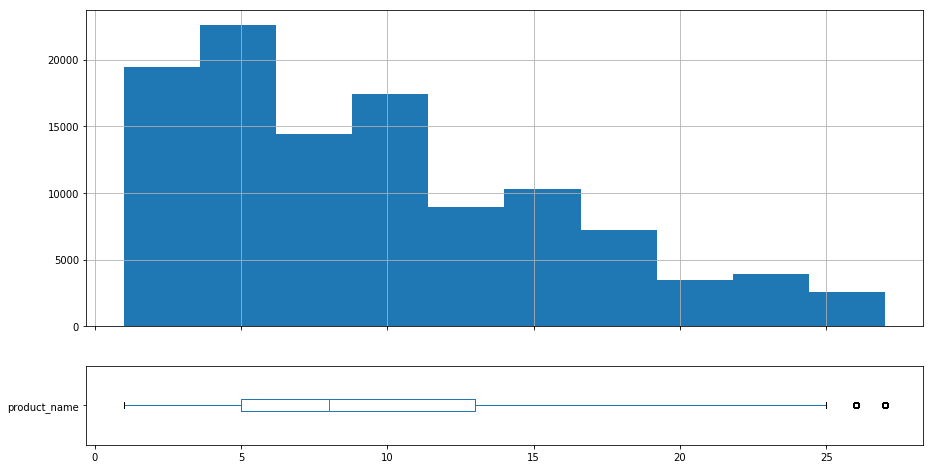

In [117]:
""" Escreva a a Solução Aqui """ 
q1, q3 = product_count.describe()[['25%', '75%']]
iqr = q3 - q1
l_sup = q3 + 1.5 * iqr
l_inf = q1 - 1.5 * iqr

fig = plt.figure(figsize=(12,8))
f, axes = plt.subplots(2,1, figsize=(15,8), sharex=True, gridspec_kw={'height_ratios':[4,1]})

product_count2 = product_count[product_count < l_sup]

product_count2.hist(bins=10, normed=False, ax=axes[0])
product_count2.plot(kind='box', vert=False, figsize=(15,8), ax=axes[1])

plt.show()

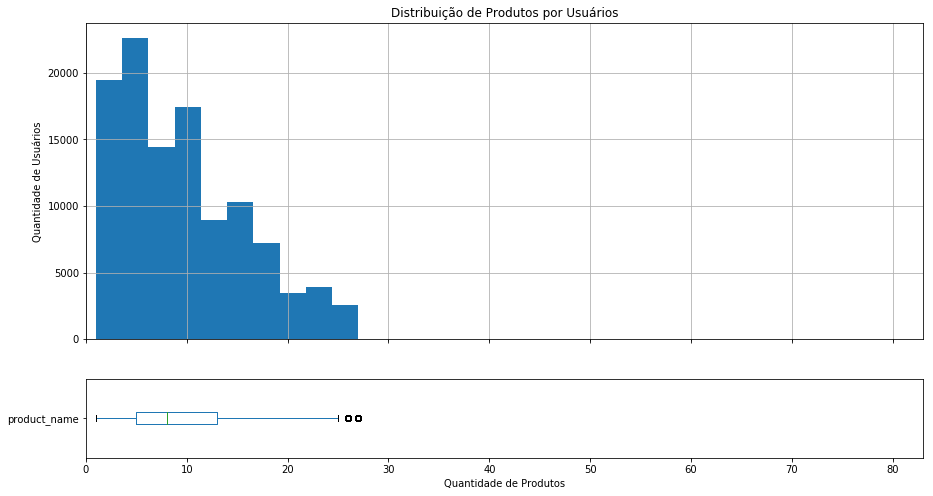

In [116]:
product_count_cut = product_count[product_count <= 27.5]

_, axes = plt.subplots(
    2, 1, 
    figsize=(15, 8), 
    sharex=True,     
    gridspec_kw={"height_ratios": [4, 1]}
)

product_count_cut.hist(bins=10, normed=False, ax=axes[0])
product_count_cut.plot(kind="box", vert=False, ax=axes[1])

axes[1].set_xlim(0, 83)

axes[1].set_xlabel("Quantidade de Produtos")
axes[0].set_ylabel("Quantidade de Usuários")
axes[0].set_title("Distribuição de Produtos por Usuários")

plt.show()

## B) Visualização da Distribuição Transformada

Uma técnica que é muito usada para compreender melhor dados de uma distribuição como essa é  a aplicação do `logaritmo` aos dados originais. Para saber mais sobre essa função matemática, consulte [esta referência](https://pt.wikibooks.org/wiki/Matem%C3%A1tica_elementar/Logaritmos).

Aplique o `logaritmo de base 10` à massa de dados e responda aos itens:

B.1) Construa uma visualização composta que mostre a distribuição de dados e os outliers.

B.2) Responda às perguntas:
* Qual o tipo dessa distribuição? 
* Existem Outliers? Descreva-os.

B.3) Proponha cortes de usuários de forma que não se percam muitos dados e que a distribuição seja mantida. Adicione os cortes à visualização usando `segmentos pontilhados de reta` e `textos com os valores dos cortes`.

B.4) Elimine os outliers e construa outro plot da nova distribuição.

### Transformação dos dados

In [ ]:
product_count_log = product_count.map(np.log10)

In [ ]:
product_count_log.describe()

In [ ]:
product_count_log.head()

### B.1) Visualização

Construa uma visualização composta que mostre a distribuição de dados e os outliers.

Depois, responda às perguntas:
* Qual o tipo dessa distribuição? 
* Existem Outliers? Descreva-os.

In [ ]:
""" Escreva a a Solução Aqui """    

### B.2) Cortes

Proponha cortes de usuários de forma que não se percam muitos dados e que a distribuição seja mantida. 

Adicione os cortes à visualização usando `segmentos pontilhados de reta` e `textos com os valores dos cortes`.

In [ ]:
""" Escreva a a Solução Aqui """    

### B.3) Nova Distribuição

Elimine os outliers e construa outro plot da nova distribuição.

In [ ]:
""" Escreva a a Solução Aqui """    